In [2]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# missing values count
df.isna().sum()
# two values missing 


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
#filling missing values as zeros
df =df.fillna(0)

In [7]:
df['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [21]:
# df['grade'].unique()
# missing values

In [8]:
df=df.drop(columns=['date'])

In [9]:
#droping the features based on their correlation with price
df.corr()['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605416
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

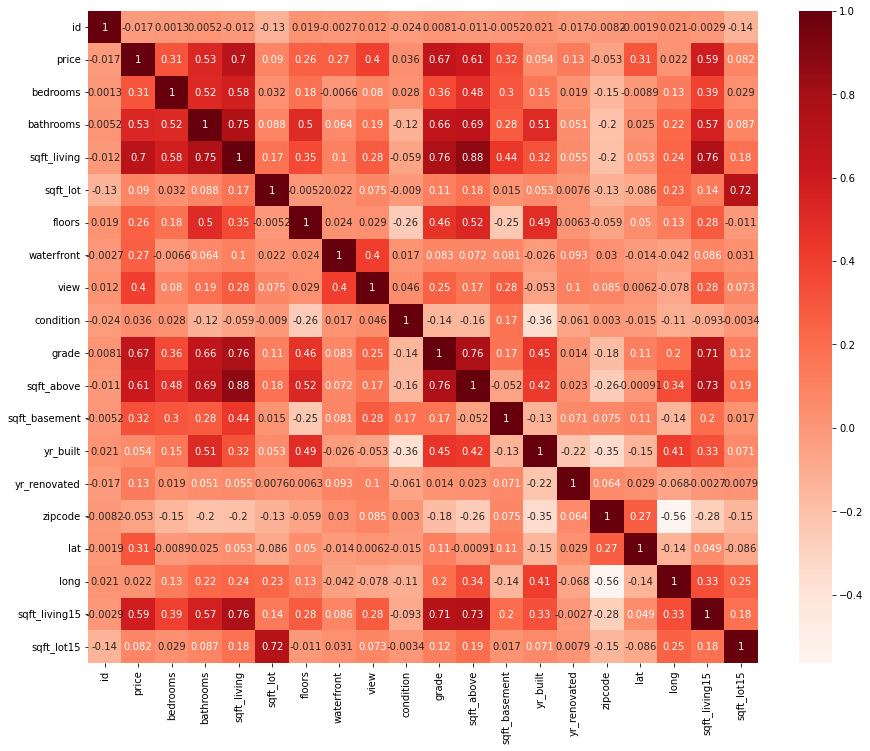

In [7]:
#Using Pearson Correlation
plt.figure(figsize=(15,12))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
columns=df.columns

In [13]:
i=0
features=[]
for corr in df.corr()['price']:
    if corr > -0.2 and corr <0.2:
        features.append(df.columns[i])
    i+=1
features

['id',
 'sqft_lot',
 'condition',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'long',
 'sqft_lot15']

In [14]:
# dropping
df = df.drop(columns=features)

In [15]:
y= df['price']
X = df.drop(columns=['price'])

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
# https://stackoverflow.com/questions/63037248/is-it-correct-to-use-a-single-standardscaler-before-splitting-data

In [37]:
# mainly performed as a preprocessing step before many machine 
# learning models, in order to standardize the
# range of functionality of the input dataset.

#### Standardize features by removing the mean and scaling to unit variance.

#### The standard score of a sample x is calculated as:

#### z = (x - u) / s

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler().fit(X_train)

In [20]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

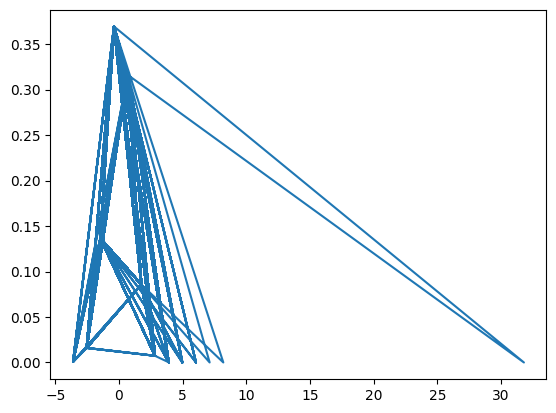

In [21]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
    
# Plot between -30 and 30 with
# 0.1 steps.
x_axis = X_train[:,0]
    
# Calculating mean and standard 
# deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
    
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

In [22]:
X_train[:,0].shape

(17290,)

In [23]:
#x-axis ranges from -3 and 3 with .001 steps
x = np.arange(-3, 3, 0.001)

#plot normal distribution with mean 0 and standard deviation 1
plt.plot(x, norm.pdf(x, 0, 1))

NameError: name 'np' is not defined